<a href="https://colab.research.google.com/github/Zahra-Ferdous/Thesis_Human_Action_Recognition_from_Depth_Video/blob/main/Sobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn
import math
%matplotlib inline
import os
import time

from numba.core.cgutils import if_likely
#from os.path import exists
import os.path 

import cv2
import sklearn
import scipy.io as sio
from numba import jit
from math import factorial, log
from sklearn.neighbors import KDTree
from scipy.signal import periodogram, welch
from astropy.timeseries import LombScargle
from scipy.io import loadmat


import imageio
from skimage import feature


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#sobel 
kernelx = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
kernely = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])


In [4]:
data = sio.loadmat('/content/drive/MyDrive/Colab Notebooks Copy Old/datasets/25x227x227.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data', 'label', 'filename'])

In [5]:
data['data'].shape
dat = data['data'][0]
dat.shape

(1165,)

In [6]:
def masked(img):
  x = np.logical_and((img>=70), (img<=90)).astype(int)
  return x


def sobel_filtered(data):

  siz = data.shape[0]
  
  for i in range(siz):
    dat = data[i]
    d = masked(dat)
    d = d.astype('float32')
    # im = cv2.resize(d, dsize=(227,227))
    data[i] = cv2.filter2D(d, -1, kernelx)

  return data

def sfi_filtered(data):
  d = masked(data)
  d = d.astype('float32')
  # im = cv2.resize(d, dsize=(227,227))
  
  img_gaussian = cv2.GaussianBlur(d,(3,3),0)
  im = cv2.filter2D(img_gaussian, -1, kernelx)
  return im

## 583 - 874

(25, 227, 227)
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600


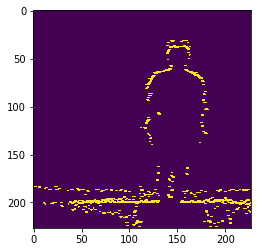

601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630


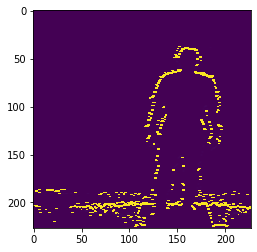

631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660


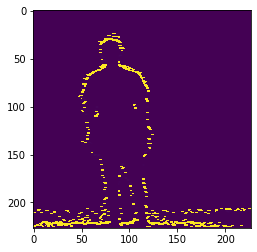

661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690


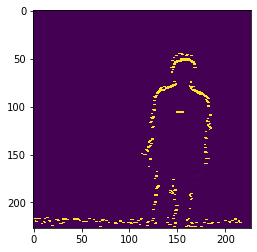

691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720


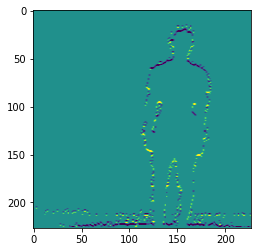

721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750


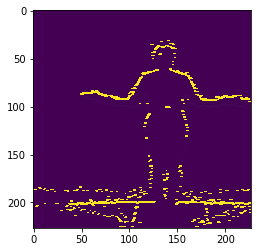

751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780


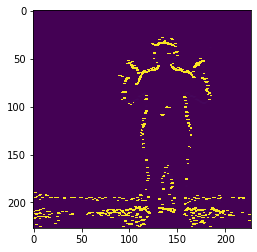

781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810


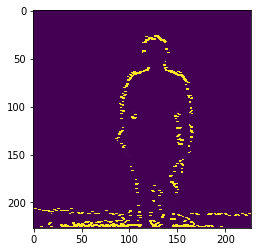

811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840


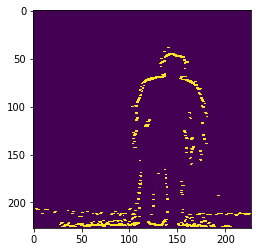

841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870


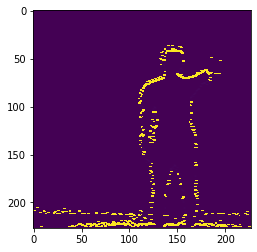

871
872
873
874


(292, 25, 227, 227)

In [7]:
arr = dat[583]
print(arr.shape)
# arr = arr[0:50:2]
d_prt = sobel_filtered(arr)
d_tot = np.array([d_prt])

# d_tot = data['data']

for i in range(584,875):
  arr = data['data'][0][i]
  print(i)
  # arr = arr[0:50:2]
  d_prt = sobel_filtered(arr)
  
  if(i%30==0):
    im = d_prt[3]
    plt.imshow(im, interpolation='nearest')
    plt.show()

  d_prt = np.array([d_prt])
  d_tot = np.concatenate( (d_tot, d_prt) , axis = 0 )

d_tot.shape

In [8]:
filename = data['filename'][0][583:875]
filename.shape
label = data['label'][0][583:875]
label.shape

(292,)

In [10]:
sio.savemat('/content/drive/MyDrive/Colab Notebooks/sobel_train__583to874_25x227x227.mat',{'data': d_tot, 'filename': filename, 'label':label},do_compression=True)

## 875 - 1165

(25, 227, 227)
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900


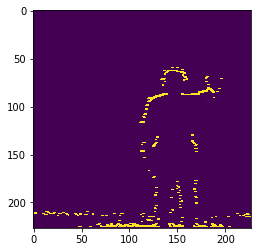

901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930


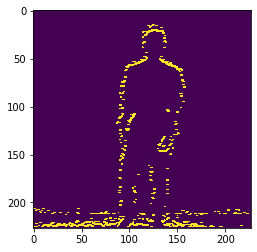

931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960


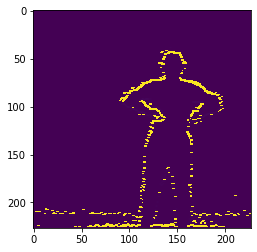

961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990


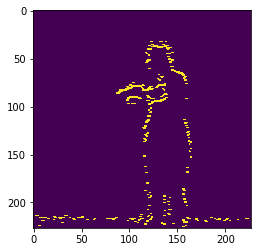

991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020


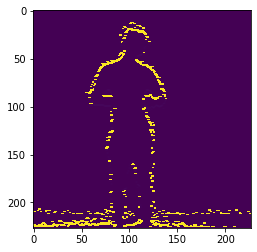

1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050


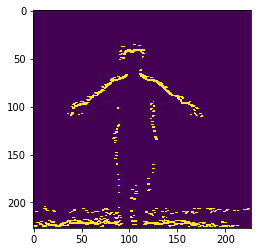

1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080


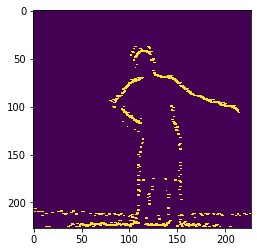

1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110


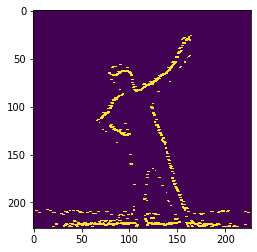

1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140


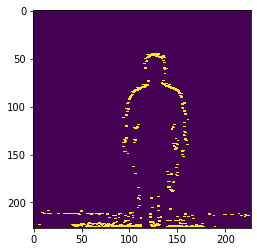

1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
(290, 25, 227, 227)


In [10]:
arr = dat[875]
print(arr.shape)
# arr = arr[0:50:2]
d_prt = sobel_filtered(arr)
d_tot = np.array([d_prt])

# d_tot = data['data']

for i in range(876,1165):
  arr = data['data'][0][i]
  print(i)
  # arr = arr[0:50:2]
  d_prt = sobel_filtered(arr)
  
  if(i%30==0):
    im = d_prt[3]
    plt.imshow(im, interpolation='nearest')
    plt.show()

  d_prt = np.array([d_prt])
  d_tot = np.concatenate( (d_tot, d_prt) , axis = 0 )

print(d_tot.shape)

In [11]:
filename = data['filename'][0][875:1165]
filename.shape
label = data['label'][0][875:1165]
label.shape

(290,)

In [12]:
sio.savemat('/content/drive/MyDrive/Colab Notebooks/sobel_train__875to1164_25x227x227.mat',{'data': d_tot, 'filename': filename, 'label':label},do_compression=True)